# STOCK PRICE PREDICTION OF ICICI COMPANY(1 yr data)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
ic_1yr=pd.read_csv('ic_1.csv')
ic_1yr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-15,341.049988,351.899994,325.049988,327.299988,327.299988,2649299.0
1,2020-04-16,325.000000,347.600006,319.350006,342.100006,342.100006,2083365.0
2,2020-04-17,358.000000,389.700012,349.100006,375.950012,375.950012,2957997.0
3,2020-04-20,377.399994,378.899994,357.200012,361.500000,361.500000,1991220.0
4,2020-04-21,340.000000,346.299988,328.250000,331.549988,331.549988,3916196.0
...,...,...,...,...,...,...,...
246,2021-04-07,568.400024,580.000000,560.000000,577.549988,577.549988,1332613.0
247,2021-04-08,581.700012,585.750000,573.250000,576.750000,576.750000,3042430.0
248,2021-04-09,574.500000,579.150024,565.049988,566.450012,566.450012,834558.0
249,2021-04-12,548.650024,551.799988,531.250000,538.400024,538.400024,1419739.0


# EXPLORATORY ic_1yr ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF DATASET
ic_1yr.shape

(251, 7)

In [4]:
#CHECKING NULL VALUES IN DATASET
ic_1yr.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
ic_1yr[ic_1yr.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
150,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#SINCE THE DATASET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
ic_1yr1=ic_1yr.dropna()
ic_1yr1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-15,341.049988,351.899994,325.049988,327.299988,327.299988,2649299.0
1,2020-04-16,325.000000,347.600006,319.350006,342.100006,342.100006,2083365.0
2,2020-04-17,358.000000,389.700012,349.100006,375.950012,375.950012,2957997.0
3,2020-04-20,377.399994,378.899994,357.200012,361.500000,361.500000,1991220.0
4,2020-04-21,340.000000,346.299988,328.250000,331.549988,331.549988,3916196.0
...,...,...,...,...,...,...,...
246,2021-04-07,568.400024,580.000000,560.000000,577.549988,577.549988,1332613.0
247,2021-04-08,581.700012,585.750000,573.250000,576.750000,576.750000,3042430.0
248,2021-04-09,574.500000,579.150024,565.049988,566.450012,566.450012,834558.0
249,2021-04-12,548.650024,551.799988,531.250000,538.400024,538.400024,1419739.0


In [7]:
ic_1yr1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#DESCIPTION OF DATASET
ic_1yr1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,444.998201,451.968401,437.031399,444.726200,444.726200,1.455287e+06
std,104.063573,104.429693,102.959240,104.055635,104.055635,1.013033e+06
min,295.399994,297.799988,285.700012,291.200012,291.200012,3.600280e+05
25%,357.625000,365.012512,349.699997,357.400002,357.400002,8.468545e+05
50%,394.149994,402.375000,388.600006,395.475006,395.475006,1.232299e+06
75%,536.974991,544.174988,529.587479,536.449997,536.449997,1.836216e+06
max,674.500000,679.299988,652.000000,674.000000,674.000000,1.186726e+07


In [9]:
#INFORMATION ABOUT DATASET
ic_1yr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.6+ KB


In [10]:
#GROUPING OF TWO SPECIFIC COLUMNS, DATE AND CLOSE
ic_1yr2 = ic_1yr1.groupby('Date')[['Close']].mean()


In [11]:
ic_1yr2

,Close
Date,
2020-04-15,327.299988
2020-04-16,342.100006
2020-04-17,375.950012
2020-04-20,361.500000
2020-04-21,331.549988
...,...
2021-04-07,577.549988
2021-04-08,576.750000
2021-04-09,566.450012


In [12]:
type(ic_1yr1.Date[0])

str

In [13]:
ic_1yr1['Date'] = pd.to_datetime(ic_1yr1['Date'], format='%Y-%m-%d')

In [14]:
type(ic_1yr1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

# VISUALIZATION OF DATASET

Text(0, 0.5, 'Price')

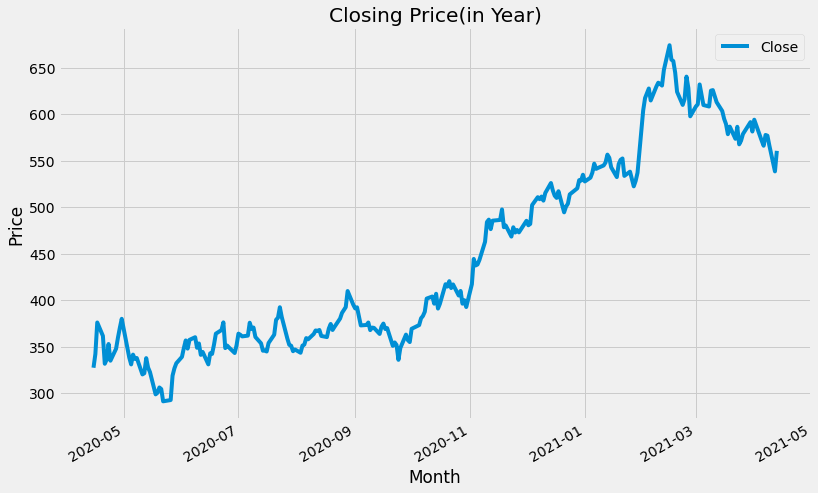

In [15]:
#plotting the graph with date againts closing price(in month)
ic_1yr1.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [16]:
ic_1yr2

,Close
Date,
2020-04-15,327.299988
2020-04-16,342.100006
2020-04-17,375.950012
2020-04-20,361.500000
2020-04-21,331.549988
...,...
2021-04-07,577.549988
2021-04-08,576.750000
2021-04-09,566.450012


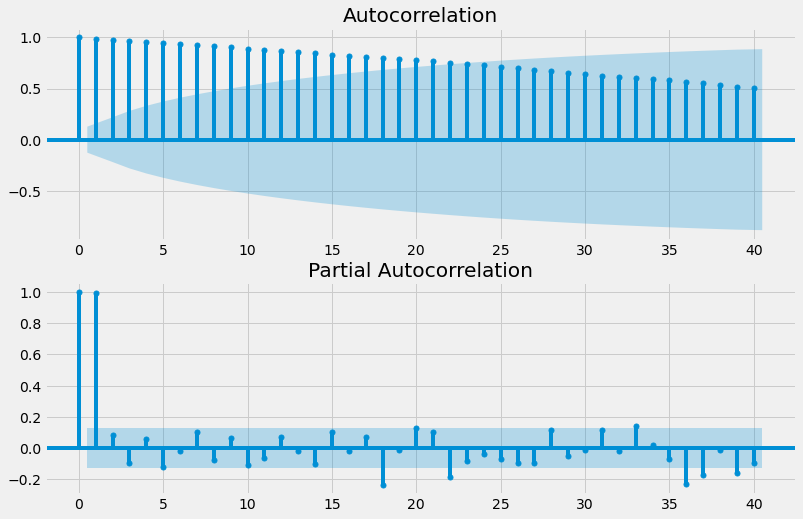

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ic_1yr2['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ic_1yr2['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [18]:
test_result=adfuller(ic_1yr2['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_1yr has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [19]:
adfuller_test(ic_1yr2['Close'])

ADF Test Statistic : -0.9274332286245698
p-value : 0.7788040877525075
#Lags Used : 0
Number of Observations Used : 249
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
ic_1yr2['Close First Difference'] = ic_1yr2['Close'] - ic_1yr2['Close'].shift(1)
ic_1yr2['Close'].shift(1)


Date
2020-04-15           NaN
2020-04-16    327.299988
2020-04-17    342.100006
2020-04-20    375.950012
2020-04-21    361.500000
                 ...    
2021-04-07    565.950012
2021-04-08    577.549988
2021-04-09    576.750000
2021-04-12    566.450012
2021-04-13    538.400024
Name: Close, Length: 250, dtype: float64

ADF Test Statistic : -10.646284503769184
p-value : 4.7864588743773025e-19
#Lags Used : 2
Number of Observations Used : 246
strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_1yr has no unit root and is stationary


Text(0.5, 1.0, 'ICICI 1 year')

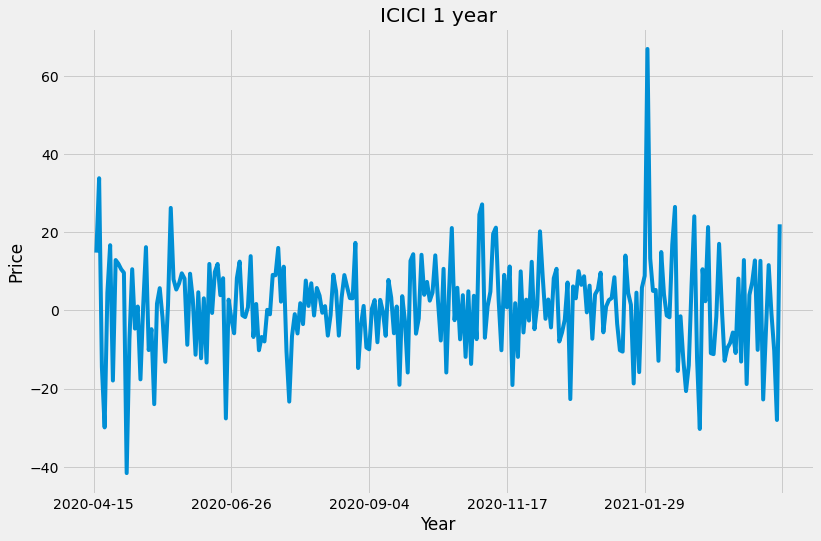

In [21]:
adfuller_test(ic_1yr2['Close First Difference'].dropna())
ic_1yr2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('ICICI 1 year')

AUTO ARIMA FUNCTION

In [22]:
stepwise_fit = auto_arima(ic_1yr2['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1952.110, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1954.099, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1954.097, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1951.597, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1956.021, Time=0.45 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.740 seconds


ARIMA MODEL(TRAINING AND TESTING OF DATA)

In [23]:
train_ic_1yr, test_ic_1yr = ic_1yr2[0:int(len(ic_1yr2)*0.7)], ic_1yr2[int(len(ic_1yr2)*0.7):]
training_ic_1yr = train_ic_1yr['Close'].values
test_ic_1yr = test_ic_1yr['Close'].values
history = [x for x in training_ic_1yr]
model_predictions = []
N_test_observations = len(test_ic_1yr)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_ic_1yr[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_ic_1yr, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 206.91896870694288


FORECASTING

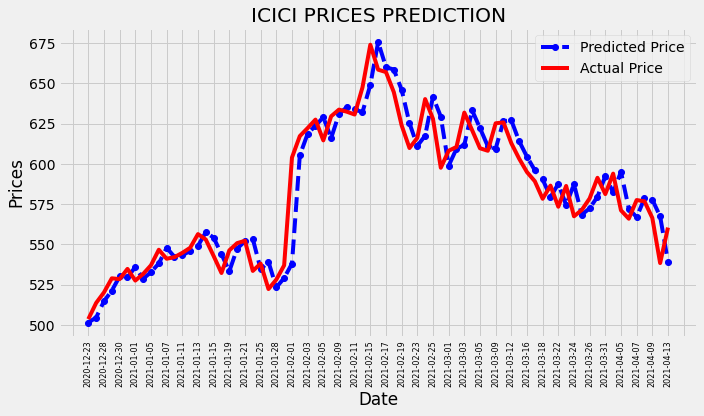

In [24]:
test_set_range = ic_1yr2[int(len(ic_1yr2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_ic_1yr, color='red', label='Actual Price')
plt.title('ICICI PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), ic_1yr2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

PREDICTION OF FUTURE PRICES

In [25]:
pred=model_fit.predict(start=len(ic_1yr2),end=len(ic_1yr2)+30,typ='levels')
print(pred)

[539.25123382 540.10244365 540.95365347 541.80486329 542.65607311
 543.50728294 544.35849276 545.20970258 546.0609124  546.91212223
 547.76333205 548.61454187 549.46575169 550.31696152 551.16817134
 552.01938116 552.87059098 553.72180081 554.57301063 555.42422045
 556.27543027 557.1266401  557.97784992 558.82905974 559.68026956
 560.53147939 561.38268921 562.23389903 563.08510885 563.93631868
 564.7875285  565.63873832]


In [26]:
# model performance
mse = mean_squared_error(test_ic_1yr, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_ic_1yr,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_ic_1yr, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_ic_1yr)/np.abs(test_ic_1yr))
print('MAPE: '+str(mape))

MSE: 206.91896870694288
MAE: 10.752321701112756
RMSE: 14.384678262197694
MAPE: 0.08313765435599672
